In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
df = pd.read_csv('/content/Walmart.csv')

# **Etapa 01**

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


**Contagem da quantidade de feriados e quantidade de dias normais**




In [ ]:
df.Holiday_Flag.value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

In [ ]:
df_Holiday_Flag = df[df.Holiday_Flag == 1]

In [ ]:
df_Holiday_Flag

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
31,1,10-09-2010,1507460.69,1,78.69,2.565,211.495190,7.787
42,1,26-11-2010,1955624.11,1,64.52,2.735,211.748433,7.838
47,1,31-12-2010,1367320.01,1,48.43,2.943,211.404932,7.838
53,1,11-02-2011,1649614.93,1,36.39,3.022,212.936705,7.742
...,...,...,...,...,...,...,...,...
6375,45,09-09-2011,746129.56,1,71.48,3.738,186.673738,8.625
6386,45,25-11-2011,1170672.94,1,48.71,3.492,188.350400,8.523
6391,45,30-12-2011,869403.63,1,37.79,3.389,189.062016,8.523
6397,45,10-02-2012,803657.12,1,37.00,3.640,189.707605,8.424


In [ ]:
df_sales_Holiday_Flag = df_Holiday_Flag.Weekly_Sales.sum()

**Vendas durante os feriados**

In [ ]:
df_sales_Holiday_Flag

505299551.56

In [ ]:
df_normal_day = df[df.Holiday_Flag == 0]

In [ ]:
df_normal_day

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
df_sales_normal_day = df_normal_day.Weekly_Sales.sum()

**Vendas durante dias normais**

In [ ]:
df_sales_normal_day

6231919435.55

**Plotar gráfico com o valor de vendas em dias normais e em feriados**

In [ ]:
df['Date'] =  pd.to_datetime(df['Date'], format='%d-%m-%Y')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
df['month'] = pd.DatetimeIndex(df['Date']).month

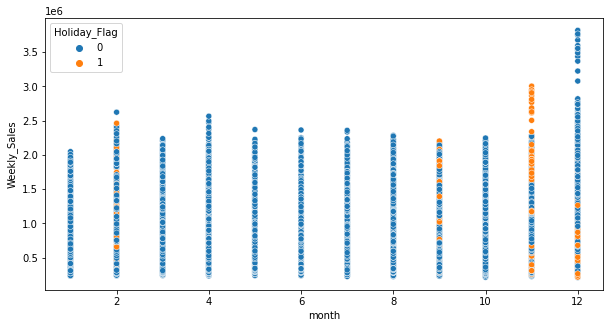

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x = "month", y="Weekly_Sales", hue="Holiday_Flag")

# **Etapa 02**

**Preço média da gasolina em feriados e em dias normais**

In [ ]:
df_Holiday_Flag.Fuel_Price.mean()

3.2274644444444442

In [ ]:
df_normal_day.Fuel_Price.mean()

3.3684671679197993

**Plotar gráfico do preço da gasolina ao longo do tempo**

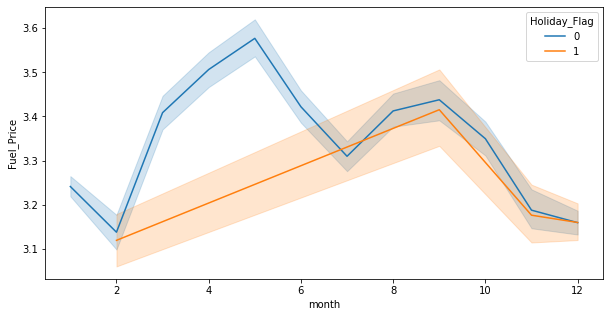

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x = "month", y="Fuel_Price", hue="Holiday_Flag")

In [ ]:
df.groupby(['month']).agg({'Fuel_Price': 'max'}).sort_values('Fuel_Price',ascending = False).reset_index()


,month,Fuel_Price
0,10,4.468
1,5,4.308
2,3,4.294
3,4,4.282
4,6,4.277
5,9,4.203
6,8,4.093
7,7,4.004
8,2,3.950
9,11,3.828


# **Etapa 03**

**Plotar gráfico de dispersão com a taxa de desemprego VS vendas**

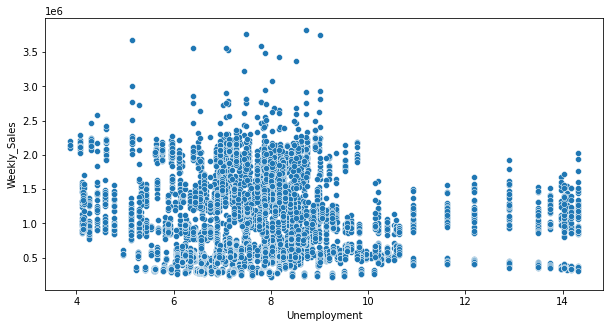

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x = "Unemployment", y = "Weekly_Sales")

- A taxa de empregabilidade afeta na quantidade de vendas? Se sim dê uma breve explicação sobre isso

  Sim, pois os consumidores perdem poder de compra

- Qual o mês que tem o maior valor da gasolina?

  Maio

- Por qual possível motivo novembro tem o maior número de vendas nos feriados? Pesquise sobre os feriados de fim de ano dos USA

  Feriado de ação de graças pode ter impactado no maior número de vendas